In [1]:
%load_ext itikz

# use sympy for exact computations and nice matrix displays
import sympy as sp

import itikz
from itikz import nicematrix as nM

# Note that in Julia, we would use an element type Rational{Int}

<div style="float:center;width:100%;text-align: center;">
    <strong style="height:60px;color:darkred;font-size:40px;">The Cholesky Decomposition</strong><br>
     <strong style="height:40px;color:darkred;font-size:40px;">Assignment 03</strong>
</div>

# Problem Statement

**Problem** (10pts) By hand: Using Gaussian elimination,
* Use Gaussian Elimination to obtain the $L D L^t$ decomposition of<br>
$\qquad A = \left(\begin{array}{rrrr} 
1 & 2 & -1 & 1 \\
2 & 13 & 7 & 11 \\
-1 & 7 & 10 & 8 \\
1 & 11 & 8 & 14 \\
\end{array}\right)$

* modify this decomposition to obtain the Cholesky decomposition of $A$
* Use the Cholesky decomposition to solve $A x = b$, where<br>
$\qquad b = \begin{pmatrix} 2 & 4 & -2 & 6 \end{pmatrix}^t\;\;$ (writing the transpose saves space!)<br>
<br>
<strong>Note:</strong> this means using forward/backward substitution!

# Part 1: The $L D L^t$ Decomposition

In [2]:
A = sp.Matrix( [[1,2,-1,1],[2,13,7,11], [-1,7,10,8],[1,11,8,14]])
print("Given matrix A =")
A

Given matrix A =


Matrix([
[ 1,  2, -1,  1],
[ 2, 13,  7, 11],
[-1,  7, 10,  8],
[ 1, 11,  8, 14]])

Given $L = E_1^{-1}  E_2^{-1} \dots E_k^{-1}$, we have $D = E_k \dots E_2 E_1 A E_1^t E_2^t \dots E_k^t$ provided the decomposition exists.

Let us compute the intermediate products for each of the $E_i$ matrices.

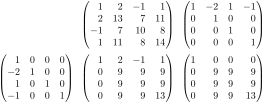

In [4]:
E_1 = sp.eye(4); E_1[1:,0] = -A[1:,0]/1
A_1 = E_1 @ A @ E_1.T

matrices = [[ None, A,    E_1.T ],
            [ E_1, E_1@A,   A_1 ]
           ]

h,_=nM.ge(matrices)
h

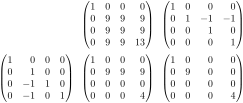

In [6]:
E_2 = sp.eye(4); E_2[2:,1] = -A_1[2:,1]/A_1[1,1]
A_2 = E_2 @ A_1 @ E_2.T
matrices = [[ None,     A_1, E_2.T ],
            [ E_2,  E_2@A_1, A_2   ]
           ]

h,_=nM.ge(matrices)
h

The $\mathbf{D}$ **matrix is diagonal!** We can stop here.

What happens if we do a row exchange, since the GE algorithm requires the $U$ matrix to be in row echelon form.

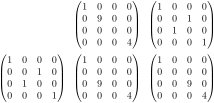

In [8]:
E_3 = sp.eye(4); [E_3[:,1],E_3[:,2]] = [E_3[:,2],E_3[:,1]]
A_3 = E_3 @ A_2 @ E_3.T
matrices = [[ None,     A_2, E_3.T ],
            [ E_3,  E_3@A_2, A_3   ]
           ]

h,_=nM.ge(matrices)
h

The $D$ matrix is still diagonal, but the GE algorithm resulted in $A = P L U$, with $P \ne I$<br>
We got lucky, since there is no pivot in column 3! The decomposition we obtain this way is
$D = L^{-1} P^t A P L$.

The correct statement for the existence of the $L D L^t$ decomposition is<br>
**the decomposition exists iff $A$ can be reduced to an upper triangular matrix without using row exchanges.**<br>
If there is a missing pivot, we cannot have a possible pivot underneath.

We have obtained the $L D L^t$ decomposition

Check A == L D Lᵗ: True



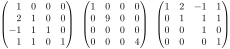

In [10]:
L = E_1.inv() @ E_2.inv()
D = A_2
print( f"Check A == L D Lᵗ: {A == L @ D @ L.T}\n")
h,_= nM.ge([[ L, D, L.T]])
h

**Remark:** the third column/row of $D$ is zero! We can remove this column from $L$ and obtain a reduced $L D L^t$ decomposition of $A$

Check reduced decomposition A == L D Lᵗ: True



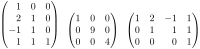

In [12]:
L_tilde = L[:,[0,1,3]]
D_tilde = D[[0,1,3],[0,1,3]]
print( f"Check reduced decomposition A == L D Lᵗ: {A == L_tilde @ D_tilde @ L_tilde.T}\n")
h,_= nM.ge([[ L_tilde, D_tilde, L_tilde.T]])
h

# Part 2: The Cholesky Decomposition

We obtained the $L D L^t$ decomposition of $A$. Since $D$ does not have any negative entries,<br>$\qquad$ we can split it into the product $D = D^{\frac{1}{2}}  D^{\frac{1}{2}}$<br>
$\qquad$ and set $G =  D^{\frac{1}{2}} L^t$ to obtain $A = G^t G$

In [13]:
sqrtD = sp.diag( *[sp.sqrt(x) for x in D.diagonal()])
print( "sqrt(D) =" )
display( sqrtD)
G = sqrtD @ L.T
print( "\nG = sqrt(D) Lᵗ,  A = Gᵗ G" )
G

sqrt(D) =


Matrix([
[1, 0, 0, 0],
[0, 3, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 2]])


G = sqrt(D) Lᵗ,  A = Gᵗ G


Matrix([
[1, 2, -1, 1],
[0, 3,  3, 3],
[0, 0,  0, 0],
[0, 0,  0, 2]])

In [14]:
print("Check A = Gᵗ G    is", A == G.T @ G)

Check A = Gᵗ G    is True


**Remark:** We can obtain the **reduced** Cholesky decomposition by using the reduced $L D L^t$ decomposition

In [15]:
sqrtD_tilde=sqrtD[[0,1,3],[0,1,3]]
print( "reduced sqrt(D) =" )
display( sqrtD_tilde)
G_tilde = sqrtD_tilde @ L_tilde.T
print( "\nreduced G" )
G_tilde

reduced sqrt(D) =


Matrix([
[1, 0, 0],
[0, 3, 0],
[0, 0, 2]])


reduced G


Matrix([
[1, 2, -1, 1],
[0, 3,  3, 3],
[0, 0,  0, 2]])

In [16]:
print( "Check reduced decomposition A: ", A == G_tilde.T @ G_tilde)

Check reduced decomposition A:  True


The existence of the Cholesky Decomposition and/or the reduced Cholesky Decomposition will be useful<br>
$\qquad$ for checking whether a matrix is **positive (semi) definite**

# Part 3: Use the Cholesky Decomposition to Solve a System of Equations

Given $A = G^t G,$ we have $\;\; A x = b \Leftrightarrow G^t G x = b \Leftrightarrow \left\{\begin{align}
G^t y = b \\ G x = y
\end{align}\right.$

The equations $G y = b$ and $G^t x = y$ can be solved by forward and backward substituion respectively.

#### Forward Substitution

In [17]:
bar = sp.Symbol('|')
b =  sp.Matrix([[2, 4, -2, 6]]).T
print( "Solve G^t\ y = b  by backsubstitution" )
G.T.row_join(sp.Matrix([bar,bar,bar,bar])).row_join( b )

Solve G^t\ y = b  by backsubstitution


Matrix([
[ 1, 0, 0, 0, |,  2],
[ 2, 3, 0, 0, |,  4],
[-1, 3, 0, 0, |, -2],
[ 1, 3, 0, 2, |,  6]])

**The variable $y_3$ is free!**

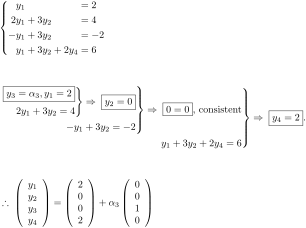

In [19]:
%%itikz --template article --tex-packages=amssymb,cascade,systeme,nicematrix,tikz,relsize --crop --tikz-libraries=decorations.pathreplacing

\systeme{y_1 = 2, 2 y_1 + 3 y_2 = 4, -y_1 + 3 y_2  = -2, y_1 + 3 y_2 + 2 y_4 = 6 }
\vspace{1cm}

% ====================================================================================
{\ShortCascade%
   {\ShortCascade%
      {\ShortCascade%
         {$\boxed{ y_3 = \alpha_3, y_1 = 2 }$}%
         {$2 y_1 + 3 y_2 = 4$}%
         {$\;\Rightarrow\; \boxed{y_2 = 0}$}%
      }%
      {$-y_1 + 3 y_2  = -2$}%
      {$\;\Rightarrow\; \boxed{0=0}$, consistent}%
   }%
   {$y_1 + 3 y_2 + 2 y_4 = 6 $}%
   {$\;\Rightarrow \; \boxed{y_4 =  2}.$}
}%
%& % --------------------------------------------------------------------------------- Standard Form
\vspace{1cm}

{$\; \therefore\;        \left( \begin{array}{r} y_1 \\ y_2 \\ y_3 \\ y_4 \end{array} \right)
                =        \left( \begin{array}{r}  2 \\  0 \\   0 \\  2 \end{array} \right)
                + \alpha_3 \left( \begin{array}{r} 0  \\  0 \\   1 \\  0 \end{array} \right)
     $
}

In [20]:
a = sp.Symbol("α_3")
y_1 = b[0,0]
y_2 = (b[1,0] - 2 * y_1)/3
y_3 = a
y_4 = (b[3,0]-y_1-3*y_2)/2
y = sp.Matrix([y_1, y_2, y_3,y_4])
y

Matrix([
[  2],
[  0],
[α_3],
[  2]])

#### Backward Substitution

In [21]:
G.row_join(sp.Matrix([bar,bar,bar,bar])).row_join( y )

Matrix([
[1, 2, -1, 1, |,   2],
[0, 3,  3, 3, |,   0],
[0, 0,  0, 0, |, α_3],
[0, 0,  0, 2, |,   2]])

We see that $\alpha_3 = 0$. The remaining system has a free variable $x_3 = \beta_3$.

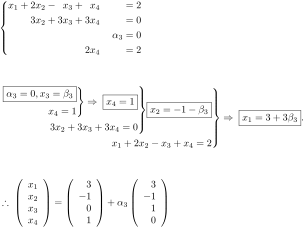

In [23]:
%%itikz --template article --tex-packages=amssymb,cascade,systeme,nicematrix,tikz,relsize --crop --tikz-libraries=decorations.pathreplacing

\systeme{x_1 +2 x_2 - x_3 + x_4=2, 3 x_2 + 3 x_3 + 3 x_4 = 0, \alpha_3=0, 2 x_4 = 2 }
\vspace{1cm}

% ====================================================================================
{\ShortCascade%
   {\ShortCascade%
      {\ShortCascade%
         {$\boxed{ \alpha_3=0, x_3 = \beta_3 }$}%
         {$ x_4=1$}%
         {$\;\Rightarrow\; \boxed{x_4=1}$}%
      }%
      {$ 3 x_2 + 3 x_3 + 3 x_4 = 0$}%
      {$\boxed{x_2=-1-\beta_3}$}%
   }%
   {$x_1 +2 x_2 - x_3 + x_4=2$}%
   {$\;\Rightarrow \; \boxed{x_1=3 + 3 \beta_3}.$}
}%
%& % --------------------------------------------------------------------------------- Standard Form
\vspace{1cm}

{$\; \therefore\;        \left( \begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right)
                =        \left( \begin{array}{r}  3 \\  -1 \\   0 \\  1 \end{array} \right)
                + \alpha_3 \left( \begin{array}{r} 3  \\ -1 \\   1 \\  0 \end{array} \right)
     $
}

In [24]:
b3 = sp.Symbol("β_3")
x_3 = b3
x_4 = 2//2
x_2 = -x_3-x_4
x_1 = 2-2*x_2+x_3-x_4
x=sp.Matrix([x_1,x_2,x_3,x_4])
x

Matrix([
[3*β_3 + 3],
[ -β_3 - 1],
[      β_3],
[        1]])

In [25]:
print( "Check A x = b: ", A@x == b)

Check A x = b:  True


#### Remark: We could have used the reduced Cholesky Decomposition instead, thereby avoiding the free variable in the y system

In [26]:
G_tilde.T.row_join(sp.Matrix([bar,bar,bar,bar])).row_join(b)

Matrix([
[ 1, 0, 0, |,  2],
[ 2, 3, 0, |,  4],
[-1, 3, 0, |, -2],
[ 1, 3, 2, |,  6]])

# Streamlined Computation of the LDLt and Cholesky Decompositions

The solution above explained each step in detail. Once understood,<br>
the computations can be presented very simply:<br>
GE of $\left( A \mid I \right)$ to create a row equivalent **upper triangular $U$** matrix<br>
(not necessarily row-echelon form)

In [27]:
A = sp.Matrix( [[1,2,-1,1],[2,13,7,11], [-1,7,10,8],[1,11,8,14]])
AI = A.row_join( sp.eye(4))
matrices = [[None, AI]]

E_1 = sp.eye(4); E_1[1:,0] = -AI[1:,0]/1
AI_1 = E_1 @ AI
matrices.append( [E_1, AI_1 ])

E_2 = sp.eye(4); E_2[2:,1] = -AI_1[2:,1]/AI_1[1,1]
AI_2 = E_2 @ AI_1
matrices.append( [E_2, AI_2 ])

<img src="Figs/CholeskyDecompositionExample.svg" style="width:15cm;">

At this point, $A \sim U$, an upper triangular matrix. We can immediately read out $A = L D L^t$:

* By augmenting by $I$, we have kept track of $L^{-1}$, since $I \sim  L^{-1} = \left( \begin{array}{rrrr} 1 & 0 & 0 & 0\\-2 & 1 & 0 & 0\\3 & -1 & 1 & 0\\1 & -1 & 0 & 1 \end{array} \right)$

* The $L$ matrix is obtained from the $E_1$ and $E_2$ matrices, by overwriting $I$ with the columns in yellow and changing the signs below the diagonal:<br>
$\qquad\qquad L =  \left( \begin{array}{rrr} 1 & 0 & 0 & 0\\2 & 1 & 0 & 0\\-1 & 1 & 1 & 0\\1 & 1 & 0 & 1  \end{array} \right)$

* The $D$ matrix is the diagonal matrix consisting of the pivots (and the missing pivot) in $U$:<br>
$\qquad\qquad D = \left( \begin{array}{rrr} 1 & 0 & 0 & 0\\0 & 9 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 & 0 & 4 \end{array} \right)$

____
Finally, we can obtain the Cholesky decomposition by splitting $D$ into $D=D^{\frac{1}{2}}\ D^{\frac{1}{2}}$.

* The matrix $D^{\frac{1}{2}}$ is diagonal with the square roots of the pivots on the diagonal<br>
  $\qquad\quad D^{\frac{1}{2}} =\left( \begin{array}{rrr} 1 & 0 & 0 & 0\\0 & 3 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 & 0 & 2 \end{array} \right)$

* The Cholesky decomposition is $A = G^t G$, where $G = D^{\frac{1}{2}} L^t$<br>
$\qquad\qquad G = \left( \begin{array}{rrr} 1 & 2 & -1 & 1\\0 & 3 & 3 & 3\\0 & 0 & 0 & 0\\0 & 0 & 0 & 2 \end{array} \right)$<br><br>
Note this just scales each row of $L^t$ by the square root of the corresponding pivot.